(                       close        day
 time                                   
 2023-06-20 03:00:00  1.32245    Tuesday
 2023-06-21 03:00:00  1.31599  Wednesday
 2023-06-22 03:00:00  1.31463   Thursday
 2023-06-23 03:00:00  1.31802     Friday
 2023-06-26 03:00:00  1.31511     Monday
 ...                      ...        ...
 2024-11-28 03:00:00  1.40073   Thursday
 2024-11-29 03:00:00  1.39998     Friday
 2024-12-02 03:00:00  1.40457     Monday
 2024-12-03 03:00:00  1.40646    Tuesday
 2024-12-04 03:00:00  1.40711  Wednesday
 
 [382 rows x 2 columns],
 <Axes: xlabel='day', ylabel='close'>)

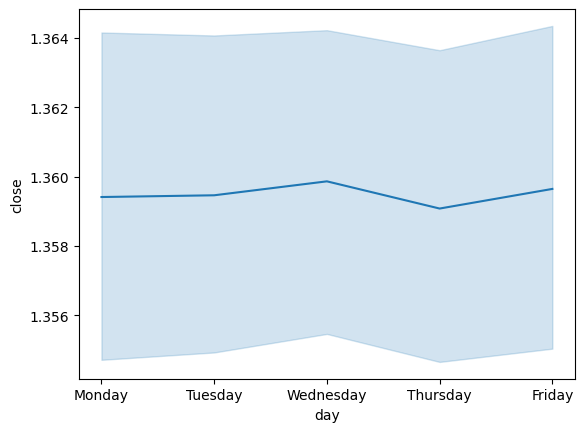

In [1]:
from models.ts.seasonality import daily, sessional, hourly

currency = "USDCAD"

daily(currency)

(                       close       session
 time                                      
 2023-03-08 03:00:00  1.37681   Tokyo(0300)
 2023-03-08 06:00:00  1.37624   Tokyo(0300)
 2023-03-08 09:00:00  1.37598   Tokyo(0300)
 2023-03-09 03:00:00  1.38107   Tokyo(0300)
 2023-03-09 06:00:00  1.37979   Tokyo(0300)
 ...                      ...           ...
 2024-11-29 00:00:00  1.40073  Sydney(2200)
 2024-11-30 00:00:00  1.39998  Sydney(2200)
 2024-12-02 00:00:00  1.40127  Sydney(2200)
 2024-12-03 00:00:00  1.40457  Sydney(2200)
 2024-12-04 00:00:00  1.40646  Sydney(2200)
 
 [1908 rows x 2 columns],
 <Axes: title={'center': 'Average Sessional Close Prices for USDCAD (Last 15 Months)'}, xlabel='session', ylabel='close'>)

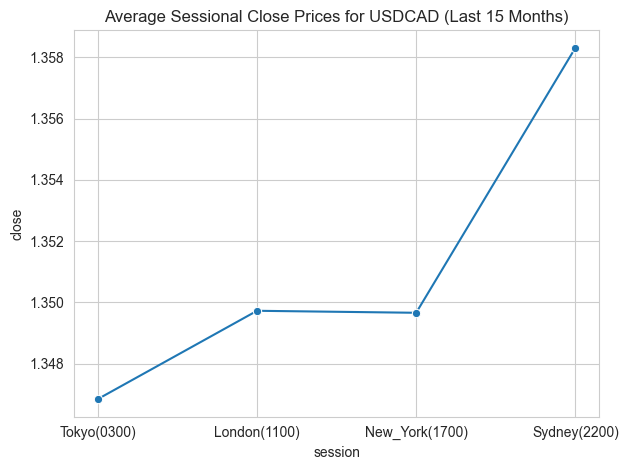

In [2]:
sessional(currency)

(                       close  hour
 time                              
 2023-03-02 17:00:00  1.36091    17
 2023-03-02 18:00:00  1.36041    18
 2023-03-02 19:00:00  1.36169    19
 2023-03-02 20:00:00  1.36242    20
 2023-03-02 21:00:00  1.36120    21
 ...                      ...   ...
 2024-12-04 01:00:00  1.40657     1
 2024-12-04 02:00:00  1.40646     2
 2024-12-04 03:00:00  1.40734     3
 2024-12-04 04:00:00  1.40708     4
 2024-12-04 05:00:00  1.40711     5
 
 [10957 rows x 2 columns],
 <Axes: title={'center': 'Average Hourly Close Prices for USDCAD (Last 15 Months)'}, xlabel='hour', ylabel='close'>)

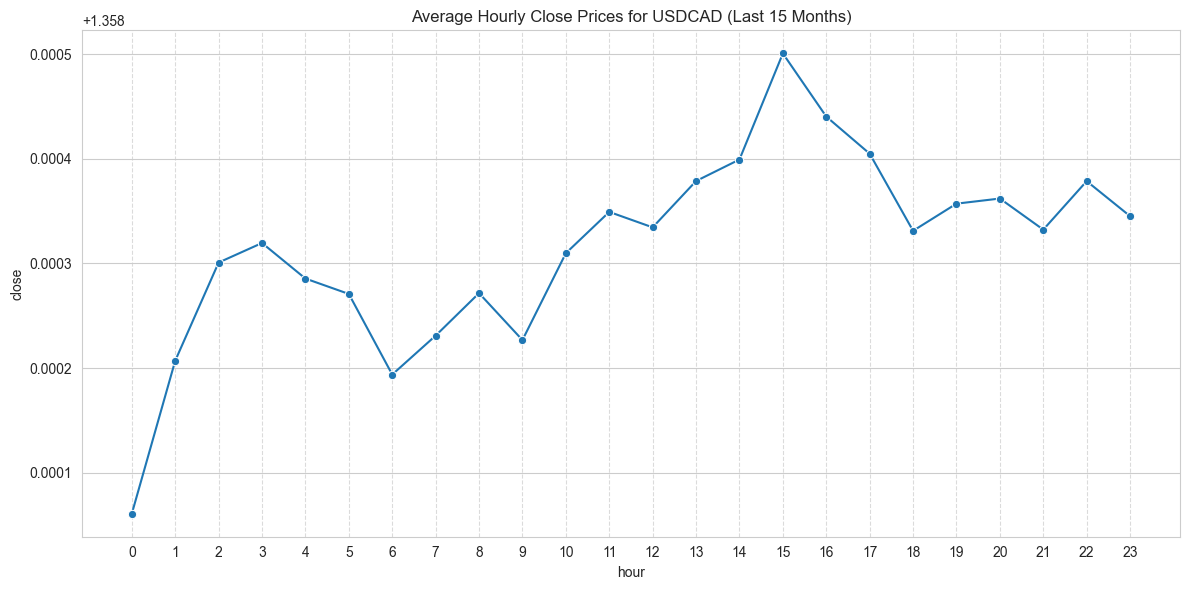

In [3]:
hourly(currency)